In [2]:
# install packages
install.packages("arules")
library(arules)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: Matrix


Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write




In [6]:
# Read in data
Sharks <- read.transactions("/content/basket_data.csv",
                            rm.duplicates = FALSE,
                            format = 'basket',
                            sep=",")
inspect(Sharks[1:10])

Warning message in readLines(file, encoding = encoding):
“incomplete final line found on '/content/basket_data.csv'”
Warning message in asMethod(object):
“removing duplicated items in transactions”


     items                                  
[1]  {swimming, Unprovoked}                 
[2]  {fishing, Provoked}                    
[3]  {snorkeling, Unprovoked}               
[4]  {surfing, Unprovoked}                  
[5]  {standing, Unprovoked}                 
[6]  {boarding, boogie, Unprovoked}         
[7]  {Unprovoked, wading}                   
[8]  {boarding, boogie, Unprovoked}         
[9]  {paddleboarding, stand, Unprovoked, up}
[10] {surfing, Unprovoked}                  


In [7]:
# apriori rule for sharks, activities that led to unprovoked attacks

Unprovoked_ARM = arules::apriori(Sharks, parameter = list(support=.005,confidence=.005,minlen=2),
                                appearance = list(default="lhs", rhs="Unprovoked"))

Unprovoked_Sorted_sup_ARM <- sort(Unprovoked_ARM, by="support", decreasing=TRUE)
inspect(Unprovoked_Sorted_sup_ARM[1:15])

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
      0.005    0.1    1 none FALSE            TRUE       5   0.005      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 8 

set item appearances ...[1 item(s)] done [0.00s].
set transactions ...[351 item(s), 1759 transaction(s)] done [0.00s].
sorting and recoding items ... [42 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [58 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
     lhs                       rhs          support    confidence coverage  
[1]  {surfing}              => {Unprovoked} 0.37635020 0.9807407  0.38374076
[2]  {swimming}             => {Unprovoked} 0.16486640 0.9830508  0.16770893
[3]  {wading}               => {Unprovoked} 0.06424105 0.

In [8]:
# apriori rule for sharks, activities that led to Provoked attacks, support is 0.01
Provoked_ARM = arules::apriori(Sharks, parameter = list(support=.005,confidence=.005, minlen=2),
                                appearance = list(default="lhs", rhs="Provoked"))

Provoked_Sorted_sup_ARM <- sort(Provoked_ARM, by="support", decreasing=TRUE)
inspect(Provoked_Sorted_sup_ARM)



Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
      0.005    0.1    1 none FALSE            TRUE       5   0.005      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 8 

set item appearances ...[1 item(s)] done [0.00s].
set transactions ...[351 item(s), 1759 transaction(s)] done [0.00s].
sorting and recoding items ... [42 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [4 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
    lhs               rhs        support     confidence coverage   lift     
[1] {fishing}      => {Provoked} 0.040932348 0.59504132 0.06878908 6.5417355
[2] {spearfishing} => {Provoked} 0.009096077 0.17977528 0.05059693 1.9764045
[3] {diving}       => {Provoked} 0.009096077 0.13333333 0.

In [11]:
# Now sort by confidence for unprovoked
Unprovoked_Sorted_con_ARM <- sort(Unprovoked_ARM, by="confidence", decreasing=TRUE)
inspect(Unprovoked_Sorted_con_ARM[1:15])

     lhs                 rhs          support     confidence coverage   
[1]  {wade}           => {Unprovoked} 0.005116543 1          0.005116543
[2]  {paddle}         => {Unprovoked} 0.005685048 1          0.005685048
[3]  {paddling}       => {Unprovoked} 0.005685048 1          0.005685048
[4]  {paddleboarding} => {Unprovoked} 0.005685048 1          0.005685048
[5]  {treading}       => {Unprovoked} 0.006253553 1          0.006253553
[6]  {submerged}      => {Unprovoked} 0.005116543 1          0.005116543
[7]  {stand}          => {Unprovoked} 0.005685048 1          0.005685048
[8]  {hookah}         => {Unprovoked} 0.005116543 1          0.005116543
[9]  {or}             => {Unprovoked} 0.006822058 1          0.006822058
[10] {up}             => {Unprovoked} 0.006822058 1          0.006822058
[11] {playing}        => {Unprovoked} 0.010233087 1          0.010233087
[12] {deep}           => {Unprovoked} 0.005116543 1          0.005116543
[13] {sitting}        => {Unprovoked} 0.009664582 1

In [13]:
# Now sort by confidence for provoked
Provoked_Sorted_con_ARM <- sort(Provoked_ARM, by="confidence", decreasing=TRUE)
inspect(Provoked_Sorted_con_ARM)

    lhs               rhs        support     confidence coverage   lift     
[1] {fishing}      => {Provoked} 0.040932348 0.59504132 0.06878908 6.5417355
[2] {spearfishing} => {Provoked} 0.009096077 0.17977528 0.05059693 1.9764045
[3] {diving}       => {Provoked} 0.009096077 0.13333333 0.06822058 1.4658333
[4] {surfing}      => {Provoked} 0.007390563 0.01925926 0.38374076 0.2117315
    count
[1] 72   
[2] 16   
[3] 16   
[4] 13   


In [14]:
# Now sort by lift for unprovoked
Unprovoked_Sorted_lift_ARM <- sort(Unprovoked_ARM, by="lift", decreasing=TRUE)
inspect(Unprovoked_Sorted_lift_ARM[1:15])

     lhs                 rhs          support     confidence coverage   
[1]  {wade}           => {Unprovoked} 0.005116543 1          0.005116543
[2]  {paddle}         => {Unprovoked} 0.005685048 1          0.005685048
[3]  {paddling}       => {Unprovoked} 0.005685048 1          0.005685048
[4]  {paddleboarding} => {Unprovoked} 0.005685048 1          0.005685048
[5]  {treading}       => {Unprovoked} 0.006253553 1          0.006253553
[6]  {submerged}      => {Unprovoked} 0.005116543 1          0.005116543
[7]  {stand}          => {Unprovoked} 0.005685048 1          0.005685048
[8]  {hookah}         => {Unprovoked} 0.005116543 1          0.005116543
[9]  {or}             => {Unprovoked} 0.006822058 1          0.006822058
[10] {up}             => {Unprovoked} 0.006822058 1          0.006822058
[11] {playing}        => {Unprovoked} 0.010233087 1          0.010233087
[12] {deep}           => {Unprovoked} 0.005116543 1          0.005116543
[13] {sitting}        => {Unprovoked} 0.009664582 1

In [16]:
# Now sort by lift for provoked
Provoked_Sorted_lift_ARM <- sort(Provoked_ARM, by="lift", decreasing=TRUE)
inspect(Provoked_Sorted_lift_ARM)

    lhs               rhs        support     confidence coverage   lift     
[1] {fishing}      => {Provoked} 0.040932348 0.59504132 0.06878908 6.5417355
[2] {spearfishing} => {Provoked} 0.009096077 0.17977528 0.05059693 1.9764045
[3] {diving}       => {Provoked} 0.009096077 0.13333333 0.06822058 1.4658333
[4] {surfing}      => {Provoked} 0.007390563 0.01925926 0.38374076 0.2117315
    count
[1] 72   
[2] 16   
[3] 16   
[4] 13   


In [18]:
install.packages("arulesViz")
library(arulesViz)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [31]:
library(tcltk)

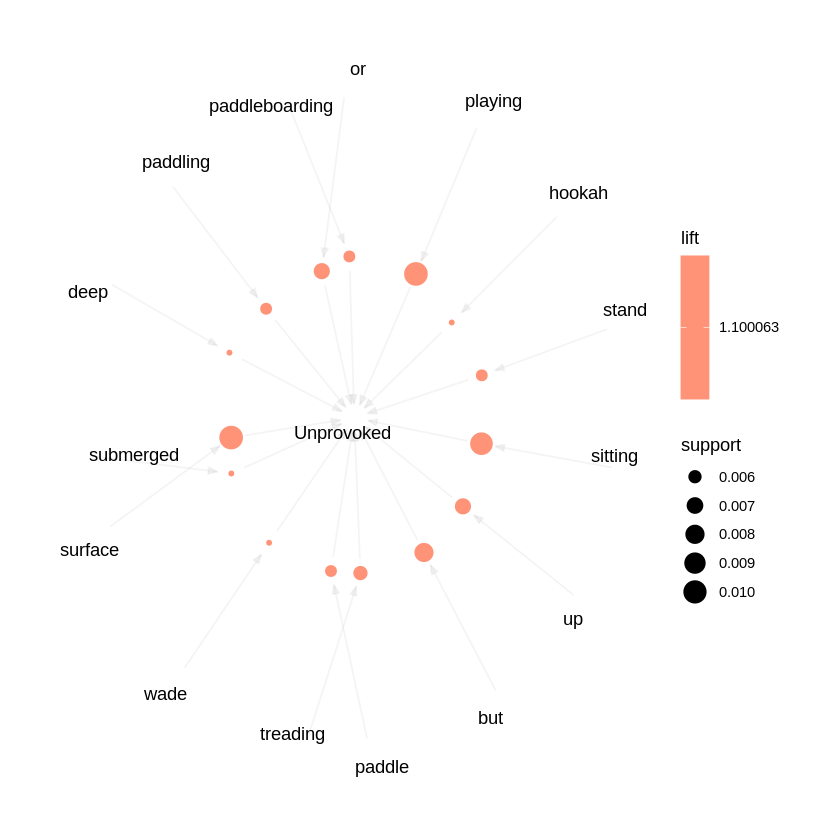

In [39]:
conf_unp_plot <- head(sort(Unprovoked_ARM, by="confidence"),15)
plot(conf_unp_plot,method="graph")

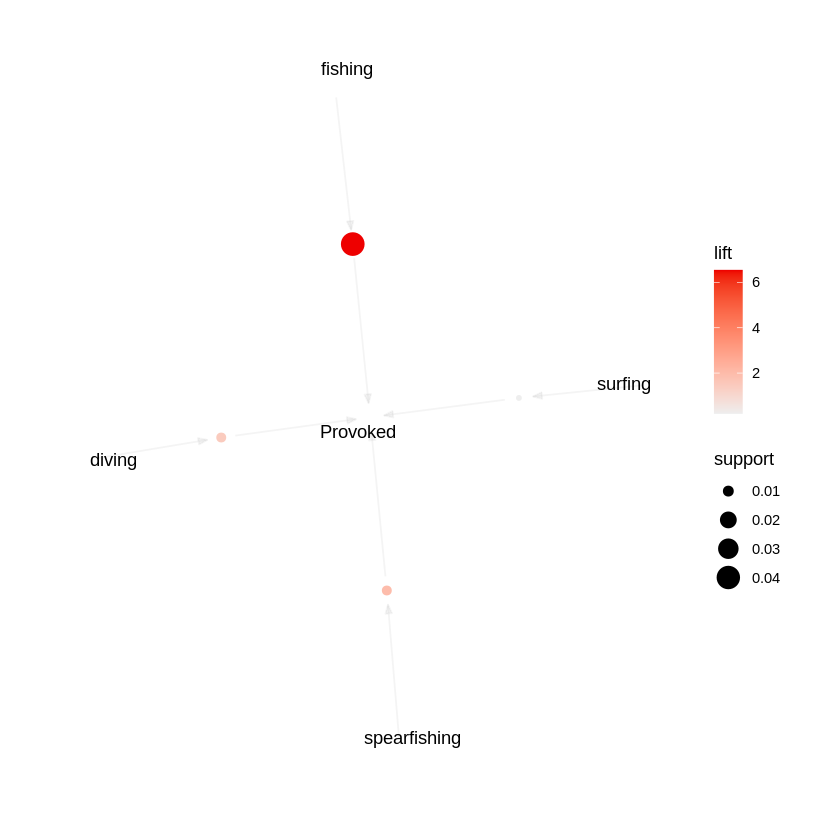

In [41]:
conf_p_plot <- head(sort(Provoked_ARM, by="confidence"),15)
plot(conf_p_plot,method="graph")

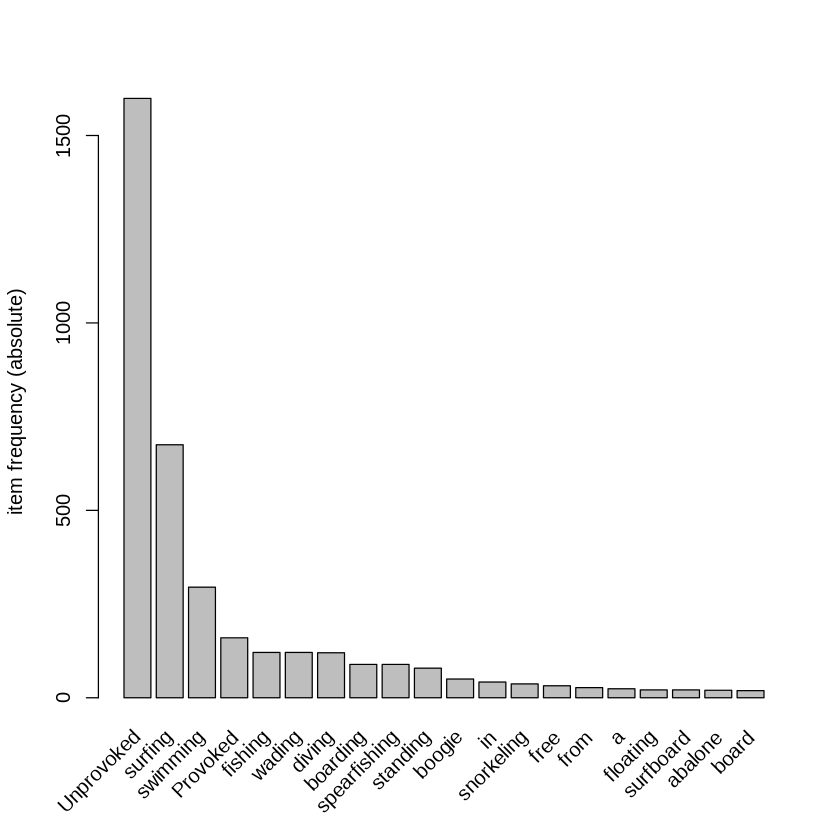

In [22]:
itemFrequencyPlot(Sharks, topN=20, type="absolute")